In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x = np.arange(1,30,1)
X = np.column_stack([x, np.sqrt(x), x**2+5])
y = 10*x**2 + 5*np.sqrt(x) + 7

In [7]:
fig = plt.figure(1)

<Figure size 640x480 with 0 Axes>

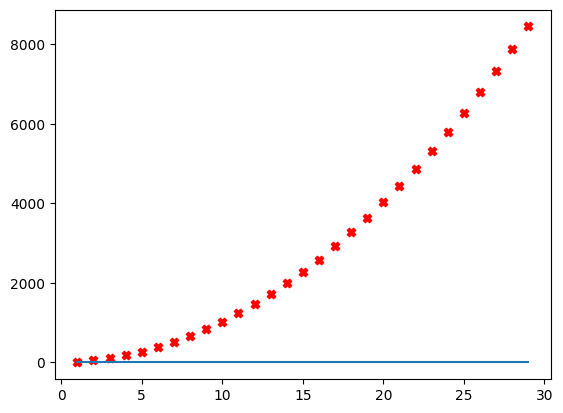

In [20]:
W = np.zeros_like(X[0,:])
b = 0.
plt.scatter(x, y, marker='X', color='red')
plt.plot(x, np.dot(X, W) + b)

In [27]:
def compute_cost(X, y, W, b):
    m = X.shape[0]
    n = X.shape[1]
    cost = 0
    for i in range(m):
        cost += (np.dot(X[i], W) + b - y[i])**2
        
    cost = cost/(2*m)
    return cost

In [28]:
print(compute_cost(X, y, W, b))

7786199.924368699


In [29]:
def compute_gradient(X, y, W, b):
    m, n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        err = (np.dot(X[i], W) + b - y[i])
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
    
        dj_db = dj_db + err
    
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db

In [30]:
print(compute_gradient(X, y, W, b))

(array([  -65680.91413699,   -13832.58487374, -1563117.82763764]), -2975.3802792483866)


In [36]:
def gradient_descent(X, y, W, b, alpha, n_iters):
    m, n = X.shape
    w_copy, b_copy = W.copy(), b
    for i in range(n_iters):
        dj_dw, dj_db = compute_gradient(X, y, w_copy, b_copy)
        w_copy = w_copy - alpha * dj_dw
        b_copy = b_copy - alpha * dj_db
        
    return w_copy, b_copy

In [58]:
alpha = 0.00000001
n_iters = 1000
w_opt, b_opt = gradient_descent(X, y, W, b, alpha, n_iters)

In [59]:
w_opt, b_opt

(array([0.33079663, 0.06958153, 7.88160494]), 0.014931418494998005)

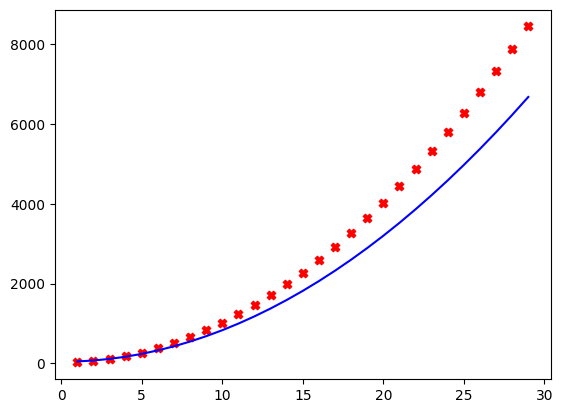

In [60]:
fig = plt.figure(2)
plt.scatter(x, y, marker='X', color='red')
plt.plot(x, np.dot(X, w_opt)+b_opt, color='blue')